In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#allows us to read stock info from google, yahoo, etc.
from pandas.io.data import DataReader

C:\Users\Jon\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
#timestamps
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
fred_currencies = ['DEXUSEU', 'DEXUSAL', 'DEXUSUK', 'DEXCAUS', 'DEXSZUS', 'DEXJPUS']

In [8]:
end = datetime.now()

In [9]:
start = datetime(end.year - 2, end.month, end.day)

In [10]:
for currency in fred_currencies:
    #make currencies global to call as its own dataframe
    globals()[currency] = DataReader(currency, 'fred', start, end)
    

In [11]:
EURUSD = DEXUSEU.dropna()
AUDUSD = DEXUSAL.dropna()
GBPUSD = DEXUSUK.dropna()
USDCAD = DEXCAUS.dropna()
USDCHF = DEXSZUS.dropna()
USDJPY = DEXJPUS.dropna()

In [12]:
EURUSD

,DEXUSEU
DATE,
2014-02-26,1.3668
2014-02-27,1.3724
2014-02-28,1.3806
2014-03-03,1.3763
2014-03-04,1.3731
2014-03-05,1.3734
2014-03-06,1.3848
2014-03-07,1.3868
2014-03-10,1.3880


In [13]:
EURUSD.describe()

,DEXUSEU
count,497.000000
mean,1.200622
std,0.114621
min,1.052400
25%,1.102500
50%,1.136300
75%,1.328400
max,1.392700


In [14]:
EURUSD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2014-02-26 to 2016-02-19
Data columns (total 1 columns):
DEXUSEU    497 non-null float64
dtypes: float64(1)
memory usage: 7.8 KB


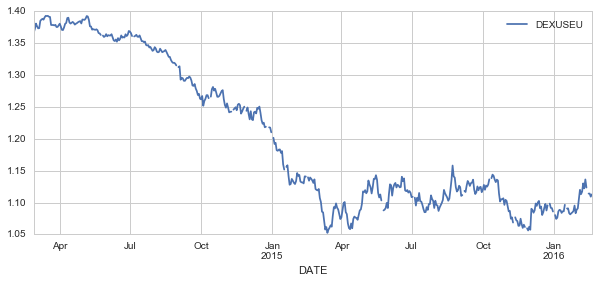

In [72]:
DEXUSEU.plot(legend=True,figsize=(10,4))

In [16]:
MA_day = [10, 20, 50]

In [102]:
for MA in MA_day:
    column_name = 'MA for %s days' %(str(MA))
    EURUSD[column_name] = pd.rolling_mean(EURUSD['DEXUSEU'], MA)

C:\Users\Jon\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


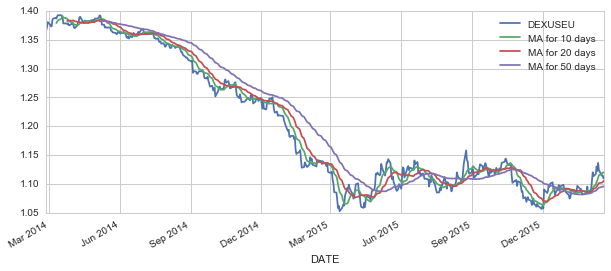

In [18]:
EURUSD[['DEXUSEU', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [19]:
EURUSD['Daily Return'] = EURUSD['DEXUSEU'].pct_change()

C:\Users\Jon\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


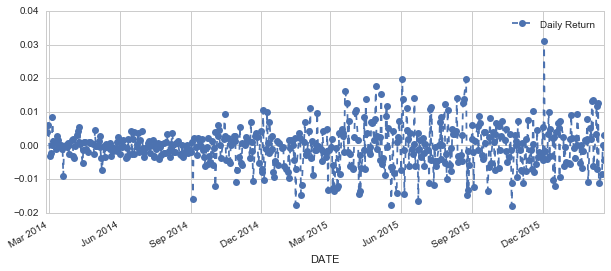

In [20]:
EURUSD['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

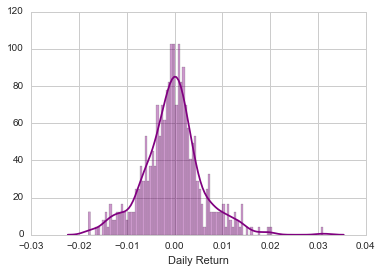

In [21]:
sns.distplot(EURUSD['Daily Return'].dropna(), bins=100, color='purple')

In [22]:
closing_df = DataReader(fred_currencies, 'fred', start, end)

In [23]:
closing_df.head()

,DEXUSEU,DEXUSAL,DEXUSUK,DEXCAUS,DEXSZUS,DEXJPUS
DATE,,,,,,
2014-02-26,1.3668,0.8962,1.6648,1.1117,0.8922,102.36
2014-02-27,1.3724,0.8960,1.6693,1.1137,0.8872,102.12
2014-02-28,1.3806,0.8933,1.6750,1.1075,0.8810,102.08
2014-03-03,1.3763,0.8929,1.6712,1.1090,0.8810,101.36
2014-03-04,1.3731,0.8940,1.6665,1.1113,0.8869,102.18


In [24]:
fred_ret = closing_df.pct_change()

In [25]:
fred_ret.head()

,DEXUSEU,DEXUSAL,DEXUSUK,DEXCAUS,DEXSZUS,DEXJPUS
DATE,,,,,,
2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27,0.004097,-0.000223,0.002703,0.001799,-0.005604,-0.002345
2014-02-28,0.005975,-0.003013,0.003415,-0.005567,-0.006988,-0.000392
2014-03-03,-0.003115,-0.000448,-0.002269,0.001354,0.000000,-0.007053
2014-03-04,-0.002325,0.001232,-0.002812,0.002074,0.006697,0.008090


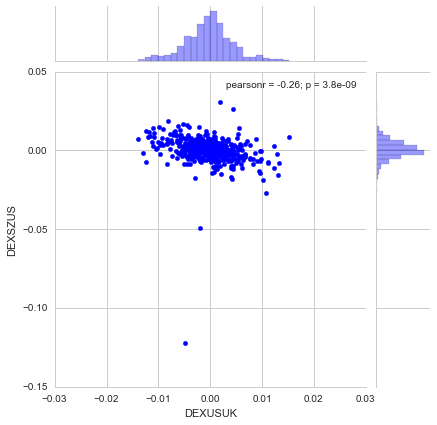

In [26]:
sns.jointplot('DEXUSUK', 'DEXSZUS', fred_ret, kind = 'scatter', color = 'blue')

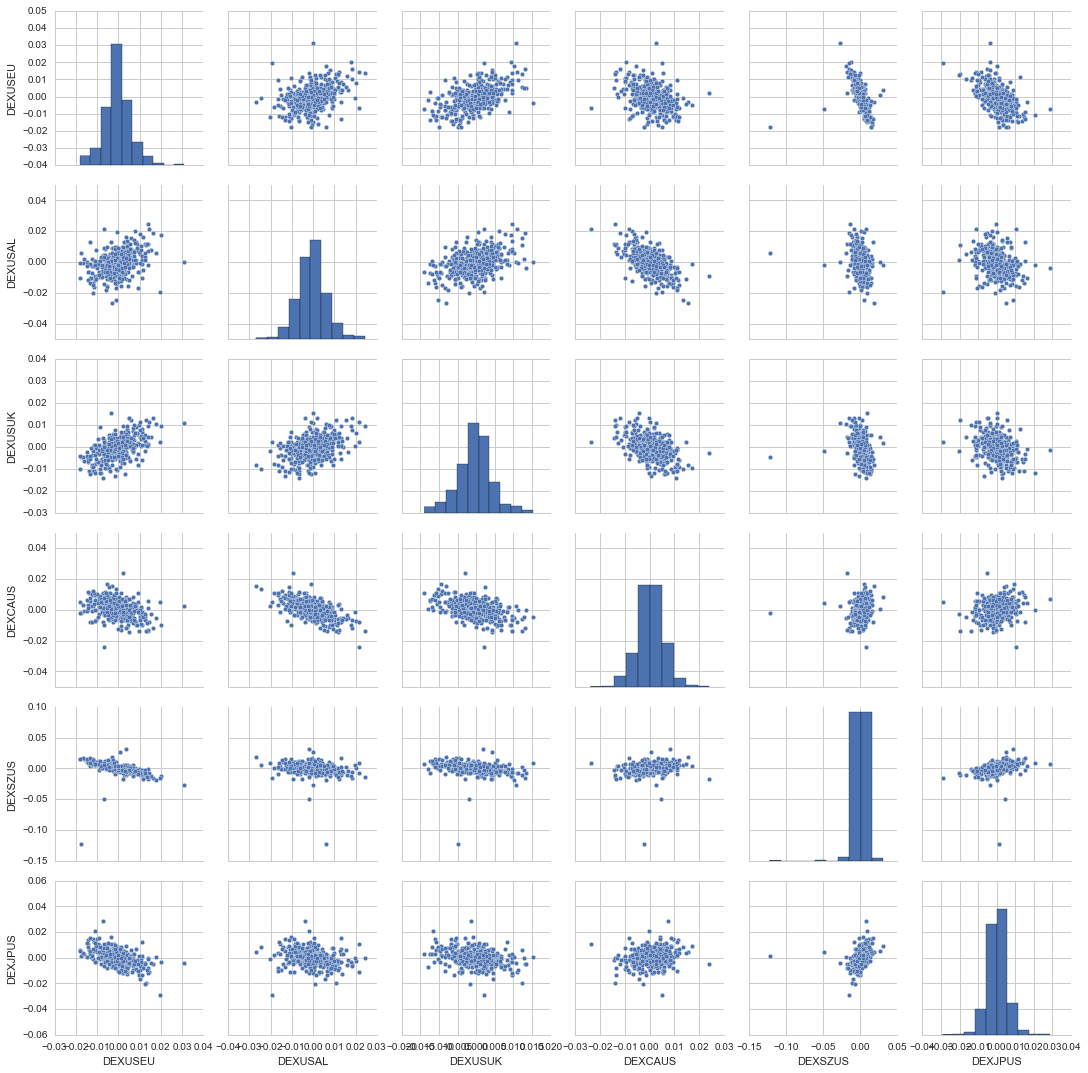

In [27]:
sns.pairplot(fred_ret.dropna())

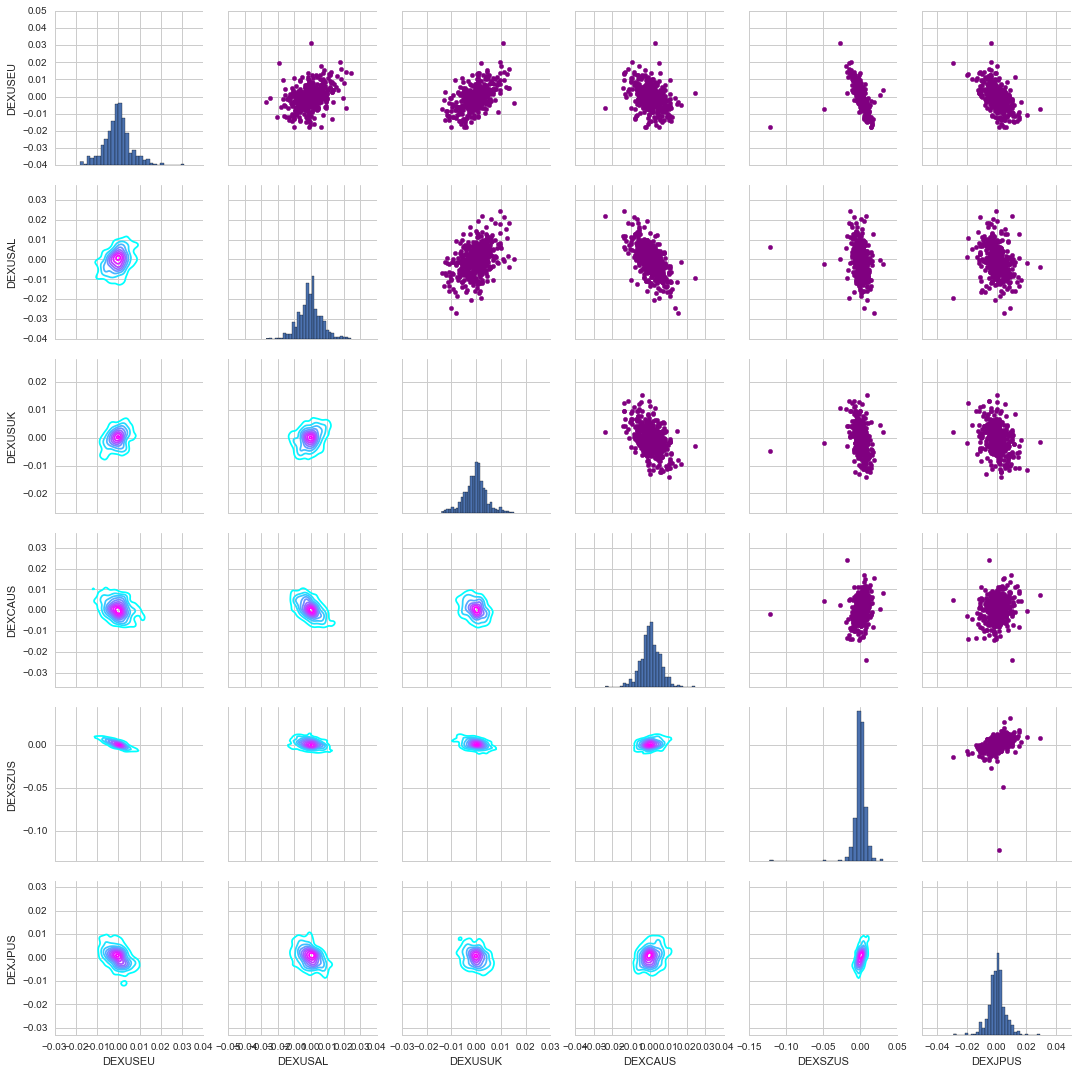

In [28]:
returns_fig = sns.PairGrid(fred_ret.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool')
returns_fig.map_diag(plt.hist, bins=30)

In [29]:
#analyze risk
rets = fred_ret.dropna()

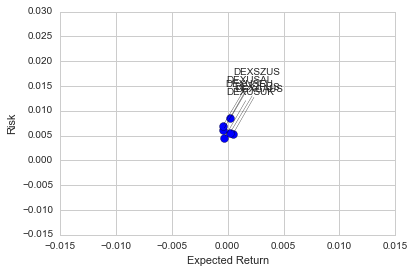

In [30]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate( label, xy = (x,y), xytext = (50,50), textcoords = 'offset points', ha = 'right', va= 'top', 
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0'))

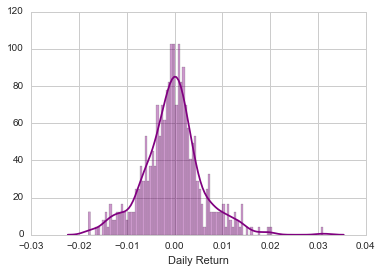

In [31]:
sns.distplot(EURUSD['Daily Return'].dropna(), bins=100, color='purple')

In [32]:
#use quantiles that are built into pandas to get the risk values
rets.head()

,DEXUSEU,DEXUSAL,DEXUSUK,DEXCAUS,DEXSZUS,DEXJPUS
DATE,,,,,,
2014-02-27,0.004097,-0.000223,0.002703,0.001799,-0.005604,-0.002345
2014-02-28,0.005975,-0.003013,0.003415,-0.005567,-0.006988,-0.000392
2014-03-03,-0.003115,-0.000448,-0.002269,0.001354,0.000000,-0.007053
2014-03-04,-0.002325,0.001232,-0.002812,0.002074,0.006697,0.008090
2014-03-05,0.000218,0.004922,0.003840,-0.005669,0.000338,0.001370


In [33]:
#95% of the time worse daily loss would not exceed derived number
rets['DEXUSEU'].quantile(0.05)


-0.011182051529974424

In [34]:
rets['DEXUSAL'].quantile(0.05)


-0.011450284629710233

In [35]:
rets['DEXUSUK'].quantile(0.05)


-0.0082604982040251074

In [36]:
rets['DEXCAUS'].quantile(0.05)


-0.0078194645970106613

In [37]:
rets['DEXSZUS'].quantile(0.05)


-0.0096241969001629735

In [38]:
rets['DEXJPUS'].quantile(0.05)

-0.009013501742160257

In [39]:
days = 365
dt = 1/days
mu = rets.mean()['DEXUSEU']
sigma = rets.std()['DEXUSEU']

In [40]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
    
    return price

In [41]:
EURUSD

,DEXUSEU,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
DATE,,,,,
2014-02-26,1.3668,NaN,NaN,NaN,NaN
2014-02-27,1.3724,NaN,NaN,NaN,0.004097
2014-02-28,1.3806,NaN,NaN,NaN,0.005975
2014-03-03,1.3763,NaN,NaN,NaN,-0.003115
2014-03-04,1.3731,NaN,NaN,NaN,-0.002325
2014-03-05,1.3734,NaN,NaN,NaN,0.000218
2014-03-06,1.3848,NaN,NaN,NaN,0.008301
2014-03-07,1.3868,NaN,NaN,NaN,0.001444
2014-03-10,1.3880,NaN,NaN,NaN,0.000865


In [103]:
start_price = 1.09325

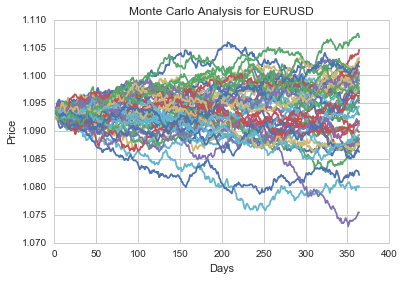

In [104]:
for run in xrange(50):
    plt.plot(monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for EURUSD')

In [105]:
runs = 10000

In [106]:
simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = monte_carlo(start_price, days, mu, sigma)[days-1]



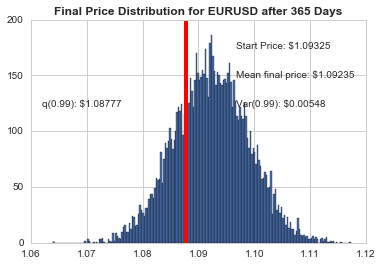

In [107]:
q = np.percentile(simulations, 25)
plt.hist(simulations,bins = 200)
plt.figtext(0.6,0.8, s = 'Start Price: $%.5f' % start_price)
plt.figtext(0.6,0.7,'Mean final price: $%.5f' % simulations.mean())
plt.figtext(0.6,0.6, 'Var(0.99): $%.5f' % (start_price-q,))
plt.figtext(0.15,0.6,'q(0.99): $%.5f' % q)
plt.axvline(x=q, linewidth = 4, color = 'r')
plt.title(u'Final Price Distribution for EURUSD after %s Days' % days, weight = 'bold')